#### Контрольный вопрос: что такое порядок точности метода?
Ваш ответ:  это характеристика, которая показывает, как быстро уменьшается ошибка метода при уменьшении шага сетки $h$. Например, если сетка имеет $m + l + 1$ узел, то погрешность метода будет равна $O(h^{l+m})$, т.е. порядок точности будет равен $l+m$, а при поиске производной методом направленной разности $\frac{f(x+h) - f(x)}{h} = ... = f'(x) + O(h)$, как не трудно заметить, порядок точности будет равен $1$


#### Контрольный вопрос: какой порядок метода будет при численном дифференцировании по $N$ узлам и почему?

Ваш ответ: метод будет иметь порядок точности $N-1$, т.к. при использовании метода неопределеннных коэффициентов можно подобрать веса так, чтобы коэффициенты при степенях ниже $N$, кроме первой, равнялись нулю. Решив систему из $N$ уравнений с $N$ неизвестными, получим формулу $N-1$ порядка аппроксимации

#### Контрольный вопрос: как называется матрица СЛАУ на коэффициенты метода неопределенных коэффицентов? Существует ли единственное решение системы и почему?

Ваш ответ: матрица СЛАУ на коэффициенты метода неопределенных коэффициентов *является матрицей Вандермонда*, *существует единственное решение*, т.к. *определитель* матрицы Вандермонда *не равен нулю*

In [1]:
# Cкрипт, который реализует алгоритм метода неопределенных коэффициентов
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l, m, n)
    # Формируем матрицу системы в нужном виде
    A = np.fliplr(np.vander(v, v.size)).T 
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p + 1)
u = np.sin(x) # ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252497


Ниже будет приведен ряд полезных функций и библиотек для выполнения задания

In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

# Исследуемая функция
def f(x):
    return np.sin(x)

# Производная исследуемой функции
def function_derivative(x):
    return np.cos(x)

# Точка, в которой вычисляем производную
x_0 = np.pi / 3

# Направленная разность
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

# Центральная разность
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

## Часть 1. Ошибка и обусловленность МНК

Задание:

1. Написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов. Используйте логарифмический масштаб, разумное число узлов. Обратите внимание, что сначала ошибка убывает, затем растет. Объясните почему.
2. Написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности. Используйте логарифмический масштаб. Объясните поведение графика.

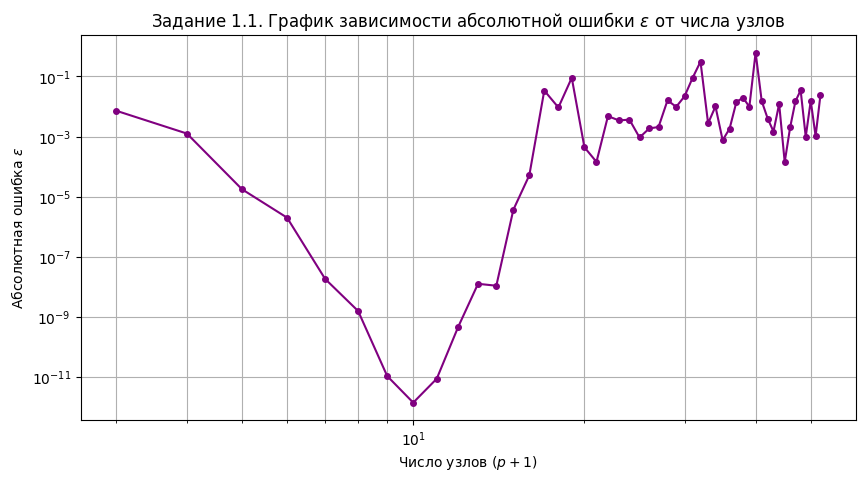

In [3]:
# Параметры
a = np.pi / 3
b = np.pi / 2

p_values = np.arange(2, 52)
errors = []

for p in p_values:
    h = (b - a) / p
    x = np.linspace(a, b, p + 1)
    u = f(x)
    diff = get_diff(u, 0, p, h)
    error = abs(diff - function_derivative(a))
    errors.append(error)

plt.figure(figsize=(10, 5))
plt.loglog(p_values + 1, errors, marker = 'o', label = 'Error', base = 10, color = 'purple', markersize = 4)
plt.xlabel(r'Число узлов $(p+1)$')
plt.ylabel(r'Абсолютная ошибка $\epsilon$')
plt.title(r'Задание 1.1. График зависимости абсолютной ошибки $\epsilon$ от числа узлов')
plt.grid(True, which="both")
plt.show()

**Объяснение поведения графика**: заметим, что сначала абсолютная ошибка убывает, т.к. ошибка метода уменьшается быстрее, чем ошибка входных данных ($\sim \frac{1}{h} \sim p$), затем растет, т.к. ошибка входных данных ($\sim \frac{1}{h} \sim p$) много больше, чем ошибка метода

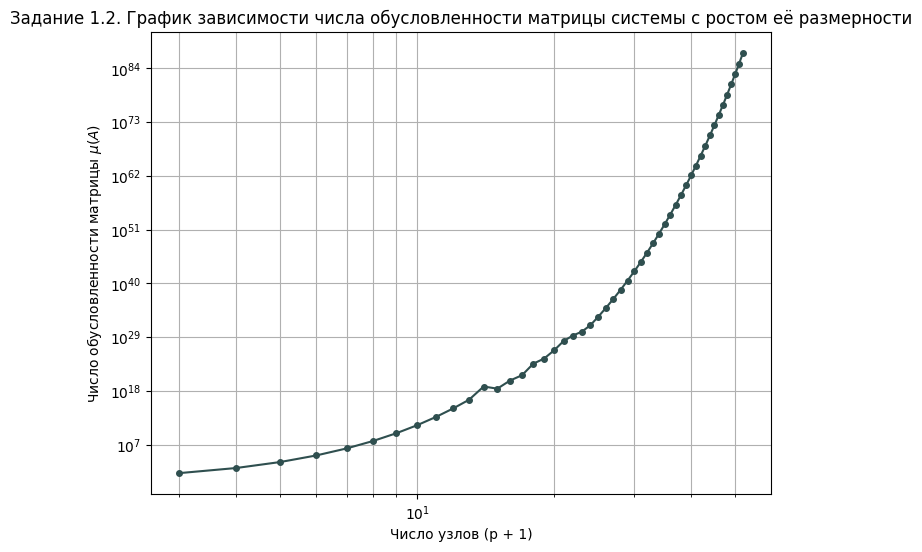

In [4]:
cond_numbers = []
p_values  = np.arange(2, 52)

for p in p_values:
    h = (b - a) / p
    x = np.linspace(a, b, p + 1)
    v = np.linspace(0, p, p + 1)
    A = np.fliplr(np.vander(v, v.size)).T
    cond_number = la.cond(A)
    cond_numbers.append(cond_number)


plt.figure(figsize=(8, 6))
plt.loglog(p_values + 1, cond_numbers, marker='o', label='Число обусловленности', color = 'DarkSlateGrey', markersize = 4)
plt.xlabel(r'Число узлов (p + 1)')
plt.ylabel(r'Число обусловленности матрицы $\mu(A)$')
plt.title(r'Задание 1.2. График зависимости числа обусловленности матрицы системы с ростом её размерности')
plt.grid(True, which="both")
plt.show()

**Объяснение поведения графика**: из курса линейной алгебры известно, что сумма собственных значений матрицы равна сумме её диагональных элементов, значит с ростом размерности матрицы увеличивается разница между $\lambda_{max}$ и $\lambda_{min}$. Можно показать, что $\mu(A) \geq \frac{|\lambda_{max}|}{|\lambda_{min}|}$, а значит этим и объясняется такое поведение графика.

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. Написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков. Исследуйте при это области как слева, так и справа от плато. Почему положения плато отличаются для двух методов и находятся именно на своих уровнях (обосновать аналитически).

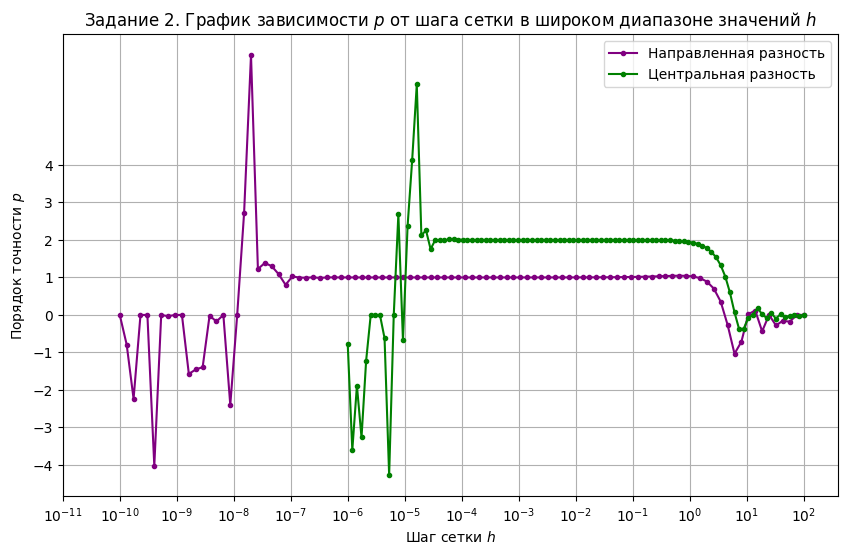

In [5]:
# Диапазон шагов для направленной разности
h_values_forward = np.logspace(-10, 2, 100)
p_forward = []

# Диапазон шагов для центральной разности
h_values_central = np.logspace(-6, 2, 100)
p_central = []

for h in h_values_forward:

    epsilon_h_forward = abs(forward_difference(f, x_0, h) - function_derivative(x_0))
    epsilon_h_half_forward = abs(forward_difference(f, x_0, h/2) - function_derivative(x_0))
    p_f = np.log2(epsilon_h_forward / epsilon_h_half_forward)

    p_forward.append(p_f)

for h in h_values_central:
    epsilon_h_central = abs(central_difference(f, x_0, h) - function_derivative(x_0))
    epsilon_h_half_central = abs(central_difference(f, x_0, h/2) - function_derivative(x_0))
    p_c = np.log2(epsilon_h_central / epsilon_h_half_central)

    p_central.append(p_c)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(h_values_forward, p_forward, marker = 'o', label = 'Направленная разность', color ='purple', markersize = 3)
plt.plot(h_values_central, p_central, marker = 'o', label = 'Центральная разность',  color ='green',  markersize = 3)
plt.xlabel(r'Шаг сетки $h$')
plt.xscale('log')
plt.xticks([1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e1, 1e2])
plt.ylabel(r'Порядок точности $p$')
plt.yticks(np.arange(-4, 5, 1))
plt.title(r'Задание 2. График зависимости $p$ от шага сетки в широком диапазоне значений $h$')
plt.grid(True, which='both')
plt.legend()
plt.show()

**Объяснение поведения графика.** Исследуем область слева от плато. Эта часть у обоих графиков отлична от константы вследствие ошибки округления (становится много больше ошибки метода). Исследуем область справа от плато. Эта часть у обоих графиков отлична от константы вследствие того, что константы $C \not\approx С_1$. 

Дадим обоснование, почему положения плато отличаются для двух методов и находятся именно на своих уровнях.

Для направленной разности: $\frac{f(x+h) - f(x)}{h} = \frac{f(x) + h \cdot f'(x) + O(h^2) - f(x)}{h} = f'(x) + O(h)$ - порядок точности $p = 1$

Для центральной разности: $\frac{f(x+h) - f(x-h)}{2h} = \frac{\left( f(x) + h \cdot f'(x) + \frac{h^2}{2} \cdot f''(x) + O(h^3) \right) - \left( f(x) - h \cdot f'(x) + \frac{h^2}{2} \cdot f''(x) + O(h^3) \right)}{2h} = f'(x) + O(h^2)$ - порядок точности $p = 2$.

Положения плато для левой части графика отличаются, так как для направленной разности ошибка метода сравняется с ошибкой округления при $h$ меньшем, чем в случае с центральной разностью.

## Часть 3. Дифференцирование с использованием полиномиальной интерполяции

Предложите вариант решения задачи численного дифференцирования на основании метода полиномиальной интерполяции по известным значениям функции. Реализуйте алгоритм, сравните его с МНК. Что общего у методов?

In [6]:
# Реализация метода численного дифференцирования с помощью полиномиальной аппроксимации Лагранжа

def lagrange_derivative(x_points, y_points, x):
    n = len(x_points)
    derivative = 0

    for i in range(n):
        basis_derivative = 0

        for j in range(n):
            if j != i:
                term = 1 / (x_points[i] - x_points[j])

                for k in range(n):
                    if k != i and k != j:
                        term *= (x - x_points[k]) / (x_points[i] - x_points[k])
                        
                basis_derivative += term

        derivative += y_points[i] * basis_derivative

    return derivative

In [7]:
# Узлы интерполяции
p = 9
x_points = np.linspace(a, b, p + 1)
y_points = f(x_points)

lagrange_diff = lagrange_derivative(x_points, y_points, x_0)

# Шаг сетки
h = (b - a)/p

# Вывод результатов
print(f"$$$ Производные в точке x = {x_0} $$$")
print(f"$$$ Производная методом Лагранжа: {lagrange_diff}")
print(f"$$$ Производная методом неопределенных коэффициентов: {get_diff(np.sin(x_points), 0, p, h)}")
print(f"$$$ Точное значение производной: {function_derivative(x_0)}")

print("\n")

print(f"### Абсолютные ошибки в точке x = {x_0} ###")
print(f"### Абсолютная ошибка метода Лагранжа: {lagrange_diff - function_derivative(x_0)}")
print(f"### Абсолютная ошибка метода неопределенных коэффициентов: {get_diff(np.sin(x_points), 0, p, h) - function_derivative(x_0)}")


$$$ Производные в точке x = 1.0471975511965976 $$$
$$$ Производная методом Лагранжа: 0.49999999999889555
$$$ Производная методом неопределенных коэффициентов: 0.5000000000013972
$$$ Точное значение производной: 0.5000000000000001


### Абсолютные ошибки в точке x = 1.0471975511965976 ###
### Абсолютная ошибка метода Лагранжа: -1.1045608871995682e-12
### Абсолютная ошибка метода неопределенных коэффициентов: 1.397104654188297e-12


**Комментарии к заданию.** Сравним алгоритм полиномиальной интерполяции с методом неопределенных коэффициентов. Оба метода дают одинаковую точность и базируются на разбиении интервала $[a,b]$ на узлы, в целях получения сетки.

Полином Лагранжа для набора точек выглядит следующим образом: $P(x) = \sum_{i=0}^{n} y_i \cdot l_i(x)$, где $l_i(x) = \prod_{\substack{0 \leq j \leq n \\ j \neq i}} \frac{x - x_j}{x_i - x_j}$. Производная такого полинома равна $P'(x) = \sum_{i=0}^{n} y_i \cdot l'_i(x)$, где $l'_i(x) = \sum_{i=0}^{n} \prod_{\substack{0 \leq j,k \leq n \\ k \neq i,j \\ i \neq j}} \frac{1}{x_i - x_j}\frac{x - x_k}{x_i - x_k}$.